## TASK 2 - Prediction using Unsupervised Machine Learning Model.

From the given 'Iris' dataset , predict the optinum number of clusters and represent it visually.

1. using Python as the programming language.

Installing Basic libraries like:
1. Pandas - to allows us to analyze big data and make conclusions based on statistical theories.
2. Numpy - to perform a wide variety of mathematical operations on arrays.
3. Matplotlib - for creating static, animated, and interactive visualizations in Python.
4. Sklearn - It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Reading the dataset by uploading and mentioning the file and its path to read the file by assigning it to a variable.

In [ ]:
df = pd.read_csv("/content/Iris_Dataset - Iris.csv")
print("Dataset created successfully")

Dataset created successfully


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Use Info()- method to print the information or summary of the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Describe() - for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Using Head() method to read the top 5 data from the entire dataset.

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

We will define the entire columns list inside a new variable to read the whole column in a one go.

In [ ]:
df_col = ['Id', 'Sepal_length (cm) ', 'Sepal_width (cm) ','Petal_Length (cm) ','Petal_width (cm) ','Species']
df.columns = df_col
df.columns

Index(['Id', 'Sepal_length (cm) ', 'Sepal_width (cm) ', 'Petal_Length (cm) ',
       'Petal_width (cm) ', 'Species'],
      dtype='object')

In [ ]:
df.head()

,Id,Sepal_length (cm),Sepal_width (cm),Petal_Length (cm),Petal_width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

Here we have created a new list named Flowers[] whose value will increment inside the model using K-mean algo.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

In [ ]:
flowers = []

for i in range(1, 11):
    iris_model = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    iris_model.fit(x)
    flowers.append(iris_model.inertia_)

Processing the model datatset by installing the core lib.

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

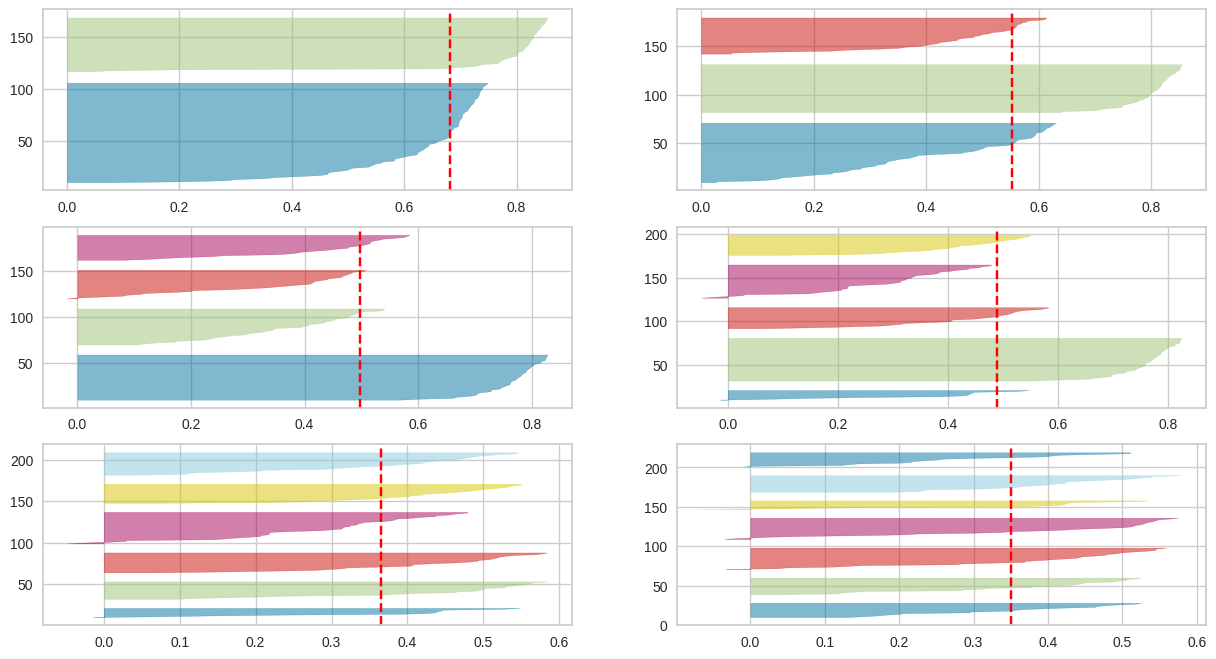

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Visualizing the formed clusters of the given Iris dataset group.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Categoring the groups of flowers and visualizing the correlation among them , as showed in different color schemes.

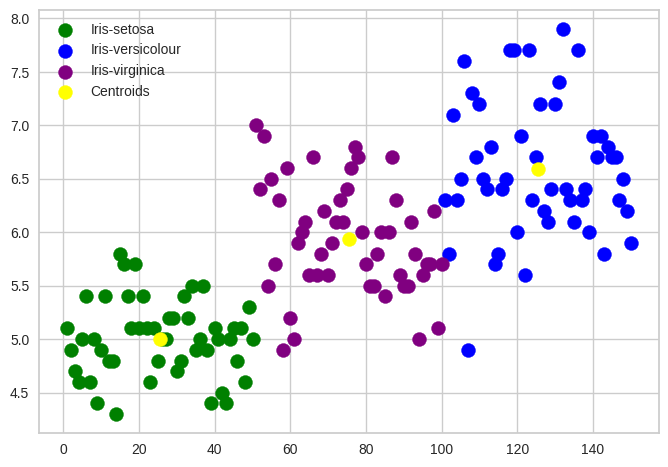

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

By this we evaluated that our dataset contains 3 clusters of Iris flower family.